# 🩺 Logistic Regression: Diabetes Prediction

In this notebook, we use **Logistic Regression**, a fundamental classification algorithm, to predict whether a patient has diabetes based on medical features. The dataset used is the well-known **Pima Indians Diabetes Dataset**, which includes variables such as glucose level, BMI, age, and insulin levels. The goal is to build a model that can classify patients as diabetic (`1`) or non-diabetic (`0`) and evaluate its performance using appropriate classification metrics.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading data
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.rename(columns={'Outcome' : 'Diabetes'} , inplace = True)

In [4]:
df.shape

(768, 9)

In [5]:
#missing values analysis
df.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

### Correlation Analysis and Data Visualization

This section examines the correlation between features and the diabetes outcome variable, then creates a scatter plot to visualize the relationship between glucose levels and diabetes status.

In [6]:
df.corr()['Diabetes']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Diabetes                    1.000000
Name: Diabetes, dtype: float64

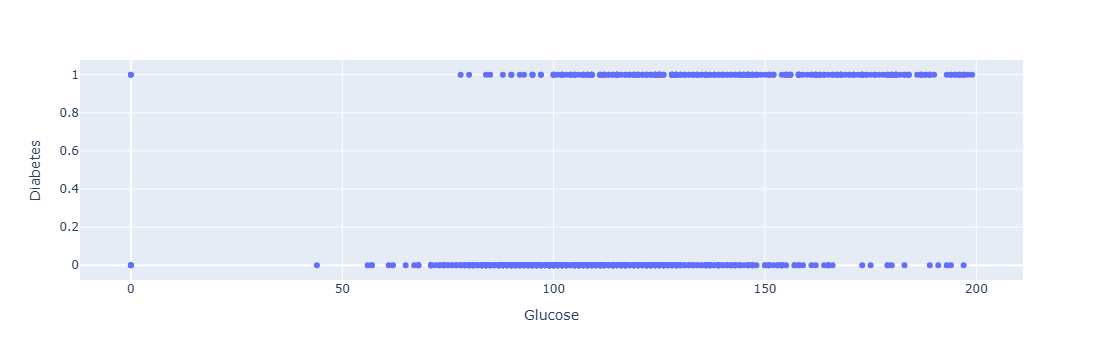

In [7]:
import plotly.express as px
px.scatter(df , x = 'Glucose' , y ='Diabetes')

In [8]:
X_train = df['Glucose'].to_numpy().reshape((len(df['Glucose'])) , 1)
Y_train = df['Diabetes'].to_numpy()

X_train.shape , Y_train.shape

((768, 1), (768,))

### Logistic Regression Using scikit-learn

In this step, we train a **Logistic Regression model** using scikit-learn to classify whether a patient has diabetes based on medical features.

#### 🔧 What’s Happening:
- The model is trained using `X_train` and `Y_train`.
- `predict()` is used to generate **binary predictions** (`0` for non-diabetic, `1` for diabetic).
- `predict_proba()` gives the **probability scores** for both classes (columns 0 and 1), where column 1 represents the probability of being diabetic.

#### 📊 Output Preparation:
- A new DataFrame `predictions_df` is created to store:
  - `Glucose` values from the original dataset
  - Actual diabetes diagnosis (`Diabetes`)
  - Predicted probability of having diabetes (`sklearn_y_Probability`)
  - Binary classification result (`sklearn_y_predictions`)

This structured output allows us to easily compare the **model's confidence** with the actual labels and predicted classes.


In [9]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(X_train , Y_train)
sklearn_y_predictions = logr.predict(X_train)
sklearn_y_predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,

In [10]:
Probability = logr.predict_proba(X_train)
Probability

array([[0.43656753, 0.56343247],
       [0.89386208, 0.10613792],
       [0.1707086 , 0.8292914 ],
       ...,
       [0.68296496, 0.31703504],
       [0.64062384, 0.35937616],
       [0.86150404, 0.13849596]], shape=(768, 2))

In [11]:
predictions_df = df[['Glucose', 'Diabetes']].copy()
predictions_df['sklearn_y_Probability'] = Probability[: , 1]
predictions_df['sklearn_y_predictions'] = sklearn_y_predictions
predictions_df.reset_index(inplace=True)
predictions_df

,index,Glucose,Diabetes,sklearn_y_Probability,sklearn_y_predictions
0,0,148,1,0.563432,1
1,1,85,0,0.106138,0
2,2,183,1,0.829291,1
3,3,89,0,0.121391,0
4,4,137,1,0.459716,0
...,...,...,...,...,...
763,763,101,0,0.178746,0
764,764,122,0,0.325291,0
765,765,121,0,0.317035,0
766,766,126,1,0.359376,0


### Visualizing Logistic Regression Predictions vs Glucose Levels

To better understand how **glucose levels** affect the model’s predictions, we use **interactive scatter plots** with Plotly.

---

####  Plot 1: Actual vs Predicted Probabilities
- Blue points show the **actual diabetes diagnosis** (`0` or `1`).
- Red points show the model’s **predicted probability** of being diabetic for each glucose level.
- This helps us see how well the model’s confidence aligns with real outcomes — higher glucose tends to lead to higher predicted probability.

---

####  Plot 2: Binary Predictions vs Probabilities
- Blue points show the **binary predictions** made by the model (`0` or `1`).
- Red points again show the **predicted probabilities**.
- This illustrates the threshold effect: when predicted probability exceeds 0.5, the model outputs a `1` (diabetic).

---

These plots highlight how **logistic regression models** turn probability outputs into classification decisions, and how well those decisions correlate with a key feature like glucose.


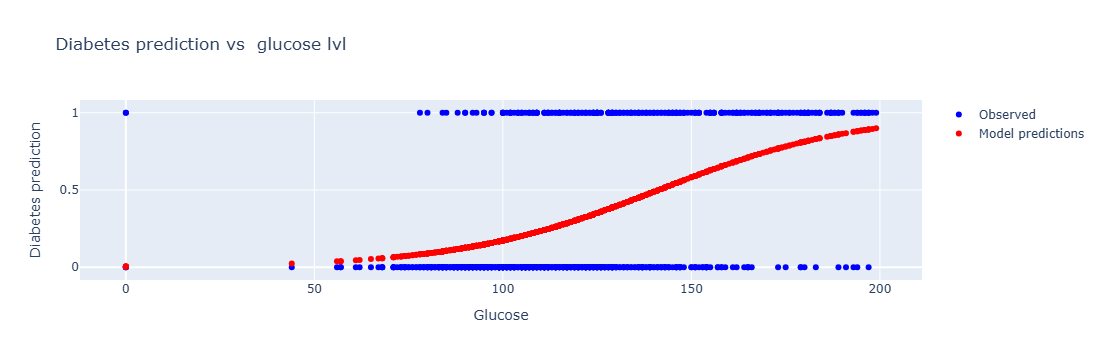

In [12]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = predictions_df['Glucose'] , y = predictions_df['Diabetes'] , mode='markers', name='Observed', marker={'color':'blue'}))

fig.add_trace(go.Scatter(x = predictions_df['Glucose'] , y = predictions_df['sklearn_y_Probability'] , mode='markers', name='Model predictions', marker={'color':'red'}))

fig.update_layout(
    title="Diabetes prediction vs  glucose lvl",
    xaxis_title="Glucose",
    yaxis_title="Diabetes prediction"
)
fig.show()

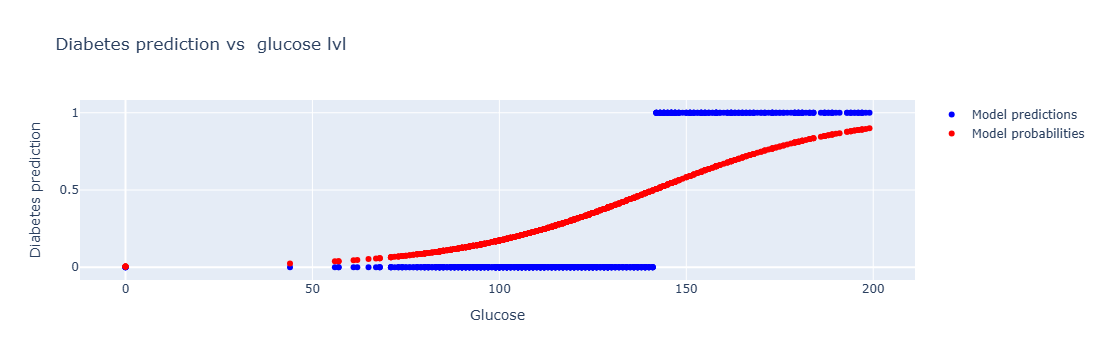

In [13]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = predictions_df['Glucose'] , y = predictions_df['sklearn_y_predictions'] , mode='markers', name='Model predictions', marker={'color':'blue'}))

fig.add_trace(go.Scatter(x = predictions_df['Glucose'] , y = predictions_df['sklearn_y_Probability'] , mode='markers', name='Model probabilities', marker={'color':'red'}))

fig.update_layout(
    title="Diabetes prediction vs  glucose lvl",
    xaxis_title="Glucose",
    yaxis_title="Diabetes prediction"
)
fig.show()

### Model Evaluation: Accuracy, Confusion Matrix & Coefficients

In this section, we evaluate the performance of our **Logistic Regression** model using:

---

1. Accuracy Score
- Measures the proportion of correct predictions out of total predictions.
- A straightforward metric to check overall performance.

2. Confusion Matrix

3. Model Coefficients & Intercept

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(predictions_df['sklearn_y_predictions'] , Y_train)
confusion_matrix(predictions_df['sklearn_y_predictions'] , Y_train)

array([[443, 138],
       [ 57, 130]])

In [15]:
logr.intercept_ , logr.coef_

(array([-5.34990586]), array([[0.03787169]]))

###  Logistic Regression from Scratch using Maximum Likelihood Estimation (MLE)

In this section, we implement **logistic regression manually** without relying on `scikit-learn`, using **gradient ascent** to maximize the **log-likelihood function**.

---

####  Key Components:

- **`sigmoid(x)`**: Activation function that maps predictions to probabilities between 0 and 1.
- **`log_likelihood(x, y, alpha, beta)`**: Computes the log-likelihood to assess how well the model fits the data.
- **`compute_gradient()`**: Calculates gradients for both the intercept (`alpha`) and weight (`beta`) using the difference between actual and predicted values.
- **`fit_Maximum_Likelihood_Estimation()`**: Uses gradient ascent to iteratively update parameters and maximize log-likelihood.

> The training loop prints the log-likelihood every 100 iterations to track convergence.

---

#### Output:
- After training, we get the optimal parameters:  
  - `alpha_hat` (intercept)  
  - `beta_hat` (coefficient for glucose)

---

#### Making Predictions:
- `get_probabilities()` applies the learned parameters to compute predicted probabilities.
- These probabilities are thresholded at 0.5 to produce binary predictions (`0` or `1`).

The final results are added to `predictions_df` for comparison with scikit-learn’s model:
- **`Our Model Probability`**: Custom logistic regression probabilities
- **`Our Model Predictions`**: Binary classification output from our scratch model

---

This implementation reinforces the mathematical foundation of logistic regression and allows transparent control over the learning process.


In [16]:
x = df['Glucose'].values
y = df['Diabetes'].values

In [17]:
def sigmoid(x):
    x = np.clip(x, -500, 500) # extra step not neccssarily required 
    return 1/(1 + np.exp(-x))

In [18]:
def log_likelihood(x,y,alpha,beta):
    z = alpha + beta*x
    preds = sigmoid(z)
    epsilon = 1e-15
    return np.sum(y*np.log(preds + epsilon) + (1-y) * np.log(1 - preds + epsilon))

In [19]:
def compute_gradient(x,y,alpha,beta):
    z = alpha + beta*x
    preds = sigmoid(z)
    error = y- preds
    d_alpha = np.sum(error)
    d_beta = np.sum(error*x)
    return d_alpha,d_beta

In [20]:
def fit_Maximum_Likelihood_Estimation(x,y,learning_rate=1e-3 ,iterations=1000):
    alpha = 0
    beta =0

    for i in range(iterations):
        d_alpha , d_beta = compute_gradient(x,y,alpha,beta)
        alpha += learning_rate * d_alpha
        beta += learning_rate * d_beta

        if i % 100 == 0:
            ll = log_likelihood(x, y, alpha, beta)
            print(f"Iter {i}: Log-Likelihood = {ll:.4f}")
            
    return {'alpha_hat': alpha, 'beta_hat': beta}

In [38]:
model = fit_Maximum_Likelihood_Estimation(x , y)
model

Iter 0: Log-Likelihood = -493.7812
Iter 100: Log-Likelihood = -404.3598
Iter 200: Log-Likelihood = -404.3598
Iter 300: Log-Likelihood = -404.3598
Iter 400: Log-Likelihood = -404.3598
Iter 500: Log-Likelihood = -404.3598
Iter 600: Log-Likelihood = -404.3598
Iter 700: Log-Likelihood = -404.3598
Iter 800: Log-Likelihood = -404.3598
Iter 900: Log-Likelihood = -404.3598


{'alpha_hat': np.float64(-0.7714374395836398),
 'beta_hat': np.float64(1.2101115215398883)}

In [39]:
def get_probabilities(model, x):
    alpha_hat = model['alpha_hat']
    beta_hat = model['beta_hat']
    return sigmoid(alpha_hat + beta_hat * x)

In [40]:
get_probabilities(model , x).shape

(768,)

In [41]:
predictions_df['Our Model Probability'] = get_probabilities(model , x)
predictions_df['Our Model Predictions'] = (get_probabilities(model , x)>0.5).astype(int)
predictions_df

,index,Glucose,Diabetes,sklearn_y_Probability,sklearn_y_predictions,Our Model Probability,Our Model Predictions
0,0,148,1,0.563432,1,0.563439,1
1,1,85,0,0.106138,0,0.106132,0
2,2,183,1,0.829291,1,0.829302,1
3,3,89,0,0.121391,0,0.121385,0
4,4,137,1,0.459716,0,0.459719,0
...,...,...,...,...,...,...,...
763,763,101,0,0.178746,0,0.178741,0
764,764,122,0,0.325291,0,0.325289,0
765,765,121,0,0.317035,0,0.317032,0
766,766,126,1,0.359376,0,0.359375,0


### Comparing Model Probabilities vs Glucose Levels

This interactive scatter plot compares the **predicted probabilities of having diabetes** from two models against the actual outcomes, all in relation to glucose levels:

- 🔵 **Observed**: Actual diabetes status (`0` or `1`) from the dataset.
- 🟢 **Scikit-learn Model**: Predicted probabilities generated by the logistic regression model built using `scikit-learn`.
- 🔴 **Our Model**: Probabilities generated by the custom logistic regression model built from scratch using maximum likelihood estimation.

By comparing these points:
- We observe how both models increase their predicted probability with higher glucose levels.
- The visual helps confirm whether both models follow similar decision trends and whether our manual model approximates scikit-learn's performance.

> This plot serves as a great way to validate the learning behavior and probability calibration of our custom model.


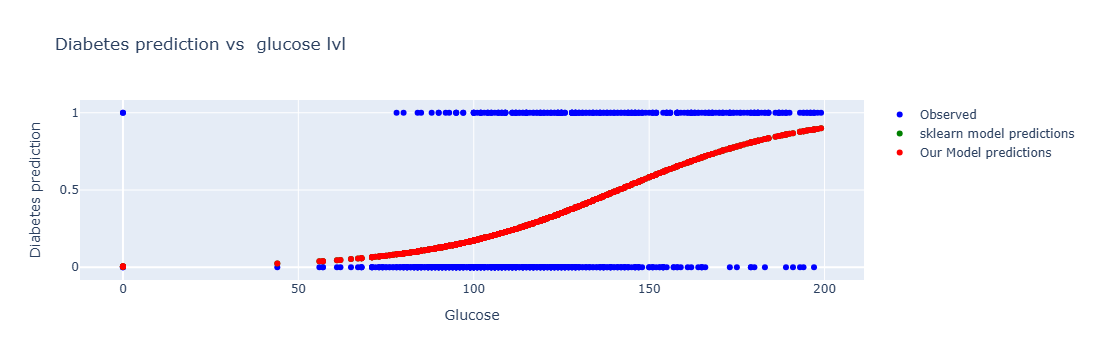

In [42]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = predictions_df['Glucose'] , y = predictions_df['Diabetes'] , mode='markers', name='Observed', marker={'color':'blue'}))

fig.add_trace(go.Scatter(x = predictions_df['Glucose'] , y = predictions_df['sklearn_y_Probability'] , mode='markers' , name = 'sklearn model predictions' , marker={'color':'green'}))

fig.add_trace(go.Scatter(x = predictions_df['Glucose'] , y = predictions_df['Our Model Probability'] , mode='markers', name='Our Model predictions', marker={'color':'red'}))

fig.update_layout(
    title="Diabetes prediction vs  glucose lvl",
    xaxis_title="Glucose",
    yaxis_title="Diabetes prediction"
)
fig.show()

In [43]:
predictions_df.drop(['sklearn_y_Probability' , 'sklearn_y_predictions'] , axis = 1)

,index,Glucose,Diabetes,Our Model Probability,Our Model Predictions
0,0,148,1,0.563439,1
1,1,85,0,0.106132,0
2,2,183,1,0.829302,1
3,3,89,0,0.121385,0
4,4,137,1,0.459719,0
...,...,...,...,...,...
763,763,101,0,0.178741,0
764,764,122,0,0.325289,0
765,765,121,0,0.317032,0
766,766,126,1,0.359375,0


###  Model Evaluation: Confusion Matrix, Accuracy & ROC Curve (Custom Logistic Regression)

In this section, we evaluate the performance of our **custom-built logistic regression model** using several classification metrics.

---

Confusion Matrix Components:

We manually calculate the following:

- **True Positives (TP)**: Cases where the model correctly predicts diabetes (`1`)
- **True Negatives (TN)**: Cases where the model correctly predicts no diabetes (`0`)
- **False Positives (FP)**: Model incorrectly predicts diabetes (`1`) for a non-diabetic
- **False Negatives (FN)**: Model incorrectly predicts no diabetes (`0`) for a diabetic

The ROC curve is a graphical representation of a classifier’s performance across different classification thresholds. It plots - True Positive Rate (Recall) vs. False Positive Rate

In [44]:
# TRUE POSITIVE
TP = ((predictions_df['Diabetes'] == 1) & (predictions_df['Our Model Predictions'] == 1)).sum()

# TRUE NEGATIVE
TN = ((predictions_df['Diabetes'] == 0) & (predictions_df['Our Model Predictions'] == 0)).sum()

# FALSE POSITIVE
FP = ((predictions_df['Diabetes'] == 0) & (predictions_df['Our Model Predictions'] == 1)).sum()

# FALSE NEGATIVE
FN = ((predictions_df['Diabetes'] == 1) & (predictions_df['Our Model Predictions'] == 0)).sum()

confusion_matrix = np.array([[TN,FN] , [FP,TP]])
confusion_matrix

array([[443, 138],
       [ 57, 130]])

In [45]:
#Accuracy score
Accuracy_score = (TP + TN) / (TP + TN + FP + FN)
Accuracy_score

np.float64(0.74609375)

AUC: 0.6855


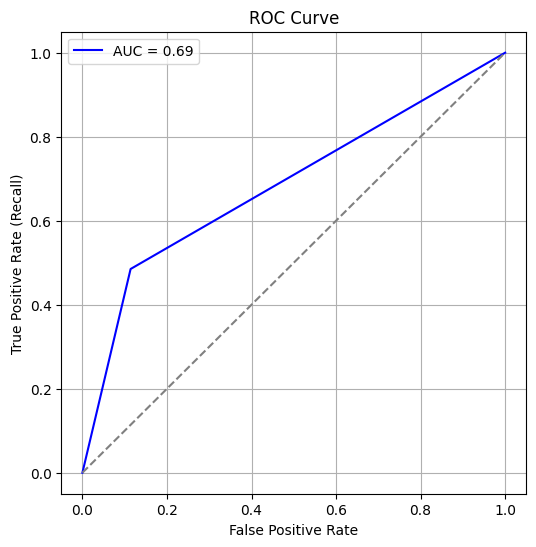

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, predictions_df['Our Model Predictions'])
auc = roc_auc_score(y,predictions_df['Our Model Predictions'])
print(f"AUC: {auc:.4f}")
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()